# Rose diagram (wind rose)

This notebook demonstrates a plot called the *rose diagram* also known as *wind rose* or *circular histogram*.

`modelskill.plotting.wind_rose` is a stand-alone function, not connected to the `Comparer` class since it relies on two variables (magnitude and direction) instead of one. It is useful for comparing circular variables such as wind/wave/current directions. 


For the example in this notebook, we are using a dataset of modelled and observed waves, which have been pre-processed to a common time axis.

In [1]:
import matplotlib.pyplot as plt
from modelskill.plotting import wind_rose
import mikeio

In [2]:
ds = mikeio.read("../tests/testdata/wave_dir.dfs0")
df = ds[[0,2,1,3]].to_dataframe()
df.head()

,China_Model: Sign. Wave Height,China_Model: Mean Wave Direction,China_Measured: Sign. Wave Height,China_Measured: Mean Wave Direction
2006-12-20 22:00:00,0.300904,320.579071,0.251520,330.387634
2006-12-20 23:00:00,0.429561,316.237732,0.228478,329.593994
2006-12-21 00:00:00,0.375983,316.113342,0.201325,321.015686
2006-12-21 01:00:00,0.369684,315.344604,0.183559,311.001648
2006-12-21 02:00:00,0.406314,313.355347,0.175971,300.778778


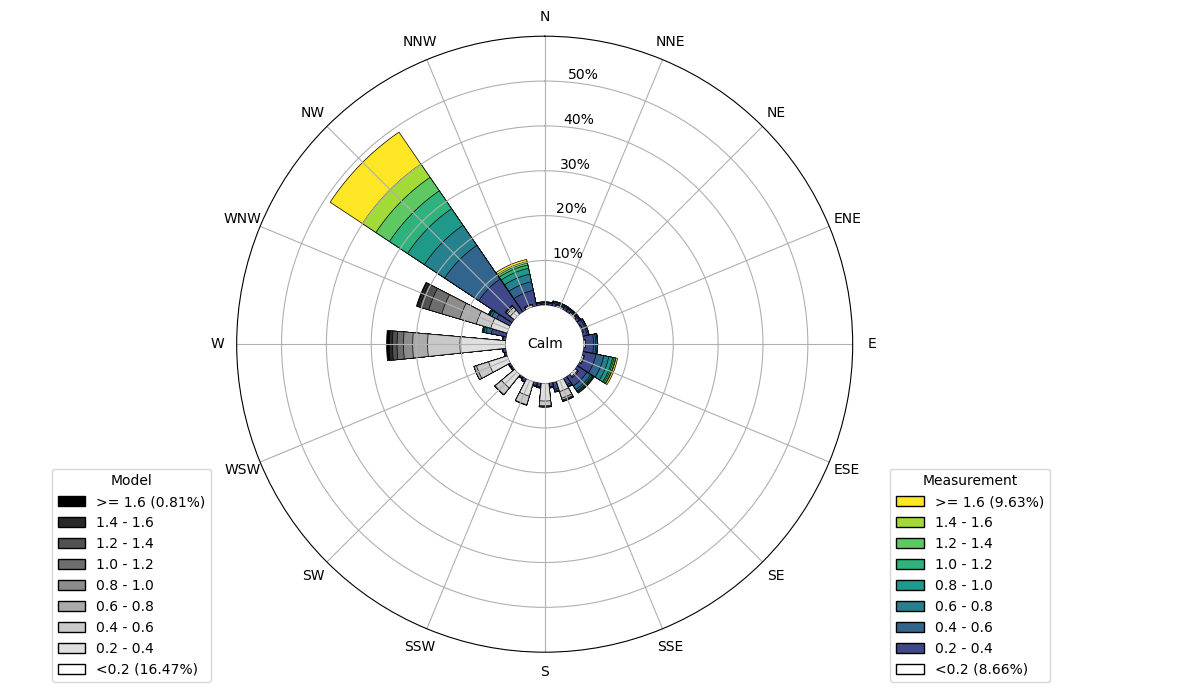

In [3]:
wind_rose(df, n_sectors=16);

The most common use case in the frame of skill assessment is to compare two datasets, but the plot can be made with a single dataset as well.

The plot is a matplotlib object, so you can tweak it by adding more information to it.

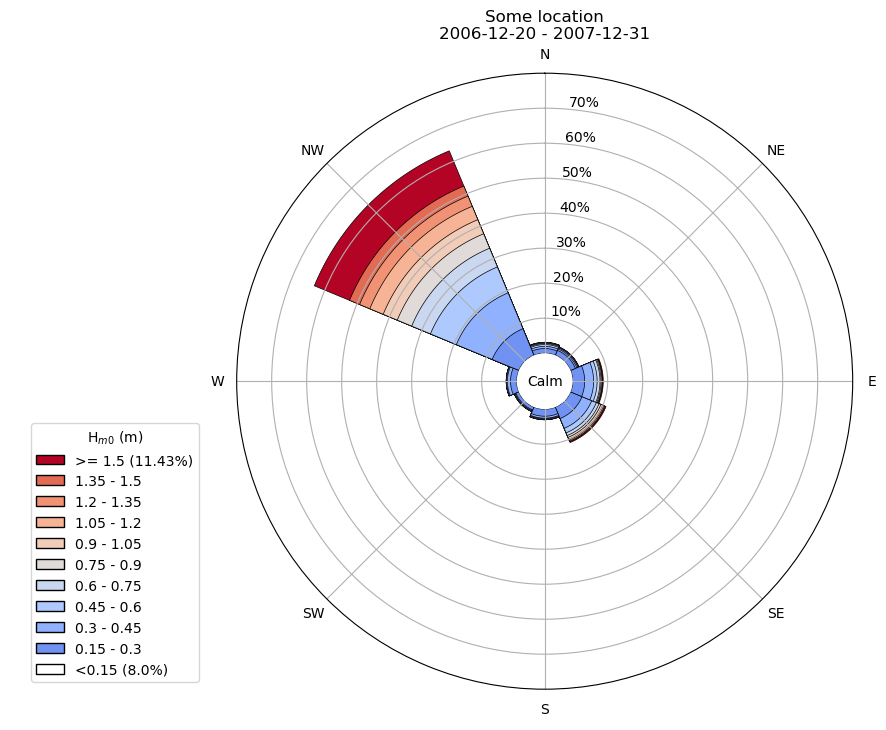

In [4]:
obs_data = df.iloc[:, [0,1]]

ax = wind_rose(obs_data, mag_step=0.15, labels=["H$_{m0}$ (m)"], cmap1="coolwarm", calm_size=0.08, n_sectors=8);

ax.set_title(f"Some location\n{df.index[0].strftime('%Y-%m-%d')} - {df.index[-1].strftime('%Y-%m-%d')}");

# save to png
# plt.savefig("wind_rose.png")
